### Imports

In [97]:
import numpy as np
import timeit
import scipy.special as sps  
import matplotlib.pyplot as plt
%matplotlib inline

### Exercice 2.

Q6

In [98]:
lamda = 1e-5

In [99]:
def equation(n, p):
    # Gaussian distribution  mu = 0 & sigma = 5 size (n, p)
    X = np.random.normal(0, 5, size=(n, p))
    # Uniform distribution over [-1,1] size n
    y = np.random.uniform(-1,1,n)


    left_hand_side = X.transpose() @ np.linalg.solve((X @ X.transpose() + lamda * np.eye(n)), y)
    right_hand_side = np.linalg.solve((X.transpose() @ X + lamda * np.eye(p)), X.transpose() @ y)

    return np.allclose(left_hand_side,  right_hand_side)

In [100]:
for n, p in {(100, 2000), (2000, 100)}:
    print(f'for {n, p} the property is {equation(n, p)}')

for (2000, 100) the property is True
for (100, 2000) the property is True


this difference is due to successive numerical approximation when computing different formulas

Q7

In [101]:
def left_hand_side(n, p):
    # Gaussian distribution  mu = 0 & sigma = 5 size (n, p)
    X = np.random.normal(0, 5, size=(n, p))
    # Uniform distribution over [-1,1] size n
    y = np.random.uniform(-1,1,n)
    return X.transpose() @ np.linalg.solve((X @ X.transpose() + lamda * np.eye(n)), y)

def right_hand_side(n, p):
    # Gaussian distribution  mu = 0 & sigma = 5 size (n, p)
    X = np.random.normal(0, 5, size=(n, p))
    # Uniform distribution over [-1,1] size n
    y = np.random.uniform(-1,1,n)
    return np.linalg.solve((X.transpose() @ X + lamda * np.eye(p)), X.transpose() @ y)

In [102]:
for n, p in {(100, 2000), (100, 1500), (100, 3000) ,(2000, 100), (1500, 100), (3000, 100)}:
    print(f'with n, p = {n, p} left hand side : ', timeit.timeit('left_hand_side(n, p)', globals=globals(), number=20),
        f'right hand side : ', timeit.timeit('right_hand_side(n, p)', globals=globals(), number=20), 
        f'where n >> p {n > p}')

with n, p = (100, 3000) left hand side :  0.8573399000015343 right hand side :  13.041415200001211 where n >> p False
with n, p = (100, 2000) left hand side :  0.5117316000032588 right hand side :  7.793965000000753 where n >> p False
with n, p = (2000, 100) left hand side :  7.702850100002252 right hand side :  0.7454433999992034 where n >> p True
with n, p = (1500, 100) left hand side :  7.584326399999554 right hand side :  0.6608373000017309 where n >> p True
with n, p = (100, 1500) left hand side :  0.7730779999983497 right hand side :  7.6696707000010065 where n >> p False
with n, p = (3000, 100) left hand side :  18.036442699998588 right hand side :  0.751949000001332 where n >> p True


we observe that the right hand side is take less computing time when n >> p and vice versa. 
we justify this variation by the complextiy generated by each of the terms :
- $(XX^{T} + \lambda Id_n)^{-1}$ so the left hand side complexity as a function of n
-  $(X^{T}X + \lambda Id_p)^{-1}$ so the right hand side complexity as a function of p

### Exercice 3.

Q8

In [103]:
n, p = 5, 5
pdf_1 = np.random.randn(n, p)
pdf_2 = np.random.exponential(scale=2.0, size=None)
pdf_3 = np.random.beta(1, 1, size=None)

In [104]:
pdf_1

array([[ 1.08694279e+00,  5.00205853e-01,  4.42245181e-01,
        -1.18386657e+00,  9.17004565e-01],
       [-2.00115309e+00, -1.67871244e+00,  1.30164428e+00,
        -1.60607551e+00,  2.39766342e+00],
       [ 8.12189441e-01,  9.82939043e-01, -8.11918318e-01,
         1.37308343e+00,  9.88976569e-01],
       [ 3.10006814e-01,  3.40609434e-01,  1.77488955e-03,
         1.17356782e+00, -9.82889887e-01],
       [-1.16278443e+00,  7.66443957e-02,  1.79204552e+00,
        -1.24499864e+00, -1.31323510e+00]])

In [105]:
# 3 distr with mean 0 and variance 2
s = np.random.uniform(-2., 2., 10000)
pdf_2 = np.random.exponential(scale=2.0, size=None)
pdf_3 = np.random.beta(1, 1, size=None)

In [106]:
s.var()

1.3448761705984238

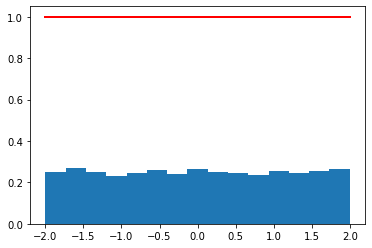

In [107]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

### Exercice 4.

Q11

In [559]:
n, p = 100, 200
X = np.random.normal(0, 5, size=(n, p))
T = 100

In [560]:
v_previous = np.random.random(p)
for k in range(1, T+1):
    u_current = X @ v_previous / np.linalg.norm(X @ v_previous)
    v_current = X.transpose() @ u_current / np.linalg.norm(X.transpose() @ u_current) 
    v_previous = v_current

Q12

In [561]:
v_previous = np.random.random(p)
u, v = [], []
for k in range(1, T+1):
    u_current = X @ v_previous / np.linalg.norm(X @ v_previous)
    v_current = X.transpose() @ u_current / np.linalg.norm(X.transpose() @ u_current)
    u.append(u_current)
    v.append(v_current)
    v_previous = v_current

In [562]:
u_star = np.linalg.svd(X)[1][0]
v_star = np.linalg.svd(X)[1][-1]

In [563]:
len(u)

100

In [564]:
def norms(u):
    norms = []
    for i in range(T):
        norms.append(np.linalg.norm(u[i] - u_star))
    return norms
len(norms(u))

100

No handles with labels found to put in legend.


Text(0, 0.5, 'y_label')

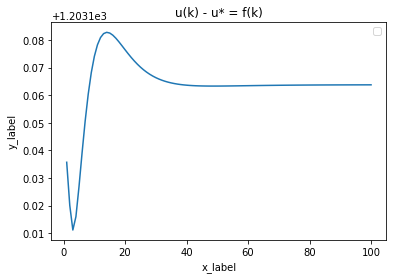

In [565]:
plt.plot(np.arange(1, T+1), norms(u))
plt.legend()
plt.title("u(k) - u* = f(k)")
plt.xlabel("x_label")
plt.ylabel("y_label")

after runing the algoritm many time we can conclude that u, v does not converge to u˚, v˚

Q13

In [566]:
for v_0 in (np.random.random(p), np.random.random(p)):
    v_previous = v_0
    u, v = [], []
    for k in range(1, T+1):
        u_current = X @ v_previous / np.linalg.norm(X @ v_previous)
        v_current = X.transpose() @ u_current / np.linalg.norm(X.transpose() @ u_current)
        u.append(u_current)
        v.append(v_current)
        v_previous = v_current
    print(norms(u)[-1])


1203.0240494304253
1203.0241605580486
